In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from collections import Counter

In [2]:
# Loading data
train = pd.read_csv("../input/database homicide.csv")

C:\Users\giris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Replacing space with underscore in column names

train.columns = train.columns.map(lambda x: x.replace(' ', '_'))

In [4]:
# Convert Categorical Features that should be numerics for analysis

train['Perpetrator_Age'] = pd.to_numeric(train['Perpetrator_Age'], errors='coerce')

In [5]:
train.dtypes

Record_ID                  int64
Agency_Code               object
Agency_Name               object
Agency_Type               object
City                      object
State                     object
Year                       int64
Month                     object
Incident                   int64
Crime_Type                object
Crime_Solved              object
Victim_Sex                object
Victim_Age                 int64
Victim_Race               object
Victim_Ethnicity          object
Perpetrator_Sex           object
Perpetrator_Age          float64
Perpetrator_Race          object
Perpetrator_Ethnicity     object
Relationship              object
Weapon                    object
Victim_Count               int64
Perpetrator_Count          int64
Record_Source             object
dtype: object

In [6]:
# Display feature types

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record_ID                638454 non-null int64
Agency_Code              638454 non-null object
Agency_Name              638454 non-null object
Agency_Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime_Type               638454 non-null object
Crime_Solved             638454 non-null object
Victim_Sex               638454 non-null object
Victim_Age               638454 non-null int64
Victim_Race              638454 non-null object
Victim_Ethnicity         638454 non-null object
Perpetrator_Sex          638454 non-null object
Perpetrator_Age          638453 non-null float64
Perpetrator_Race         638454 non-null object
Perpetrator_Ethnicity    638

In [7]:
# Review the distribution of the numerical features

train.describe()

,Record_ID,Year,Incident,Victim_Age,Perpetrator_Age,Victim_Count,Perpetrator_Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638453.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,20.322697,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,17.886842,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,21.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,31.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,99.000000,10.000000,10.000000


In [8]:
# Check missing values in train set

null_columns = train.columns[train.isnull().any()]
null_columns

Index(['Perpetrator_Age'], dtype='object')

In [9]:
# Drop the unnecessary columns 

data = (train.drop(['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type',
       'Record_Source'],axis=1))

In [10]:
data.head()

,City,State,Year,Month,Incident,Crime_Type,Crime_Solved,Victim_Sex,Victim_Age,Victim_Race,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count
0,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0
2,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0
3,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0
4,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1


In [11]:
# Separate variables into new data frames

numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
"There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1])

'There are 7 numeric and 17 categorical columns in train data'

In [12]:
data.corr()

,Year,Incident,Victim_Age,Perpetrator_Age,Victim_Count,Perpetrator_Count
Year,1.000000,0.124125,0.005514,-0.028447,0.026765,0.055959
Incident,0.124125,1.000000,-0.006918,-0.026061,0.001781,0.001951
Victim_Age,0.005514,-0.006918,1.000000,0.041919,-0.008047,-0.017289
Perpetrator_Age,-0.028447,-0.026061,0.041919,1.000000,0.026554,0.008878
Victim_Count,0.026765,0.001781,-0.008047,0.026554,1.000000,0.067284
Perpetrator_Count,0.055959,0.001951,-0.017289,0.008878,0.067284,1.000000


In [13]:
del numeric_data['Record_ID']

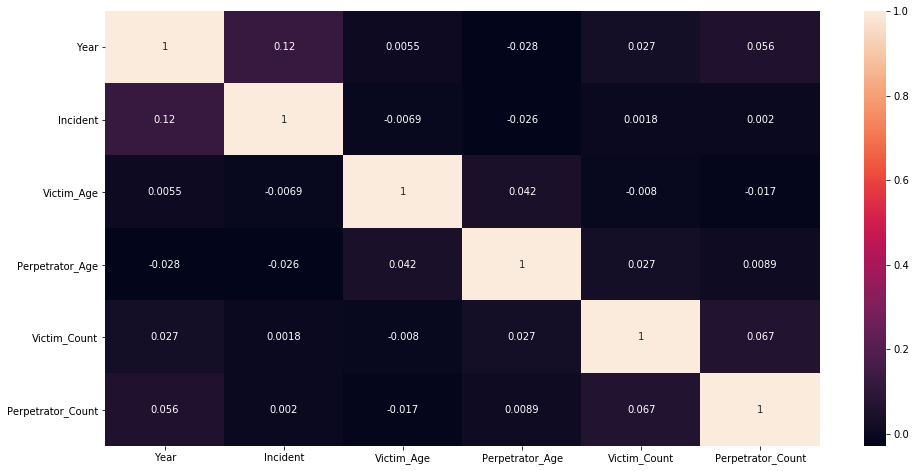

In [14]:
# Correlation plot

corr = numeric_data.corr()
sns.heatmap(corr, annot = True)

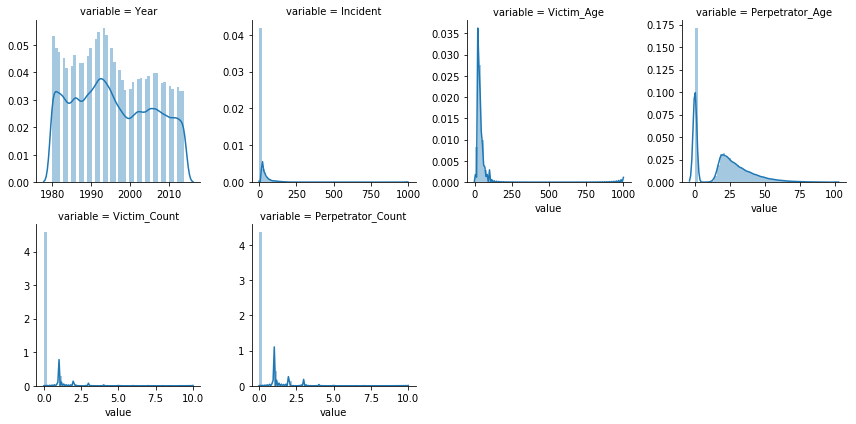

In [15]:
# Create numeric plots

num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Record_ID')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [16]:
# Skewness
format(train[['Perpetrator_Count','Year']].skew())

'Perpetrator_Count    4.654220\nYear                 0.158051\ndtype: float64'

In [17]:
#State with the highest amount of historical homicide crimes

r = train.groupby(["State"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
r

,State,Count
4,California,99783
43,Texas,62095
32,New York,49268
9,Florida,37164
22,Michigan,28448
13,Illinois,25871
38,Pennsylvania,24236
10,Georgia,21088
33,North Carolina,20390
18,Louisiana,19629


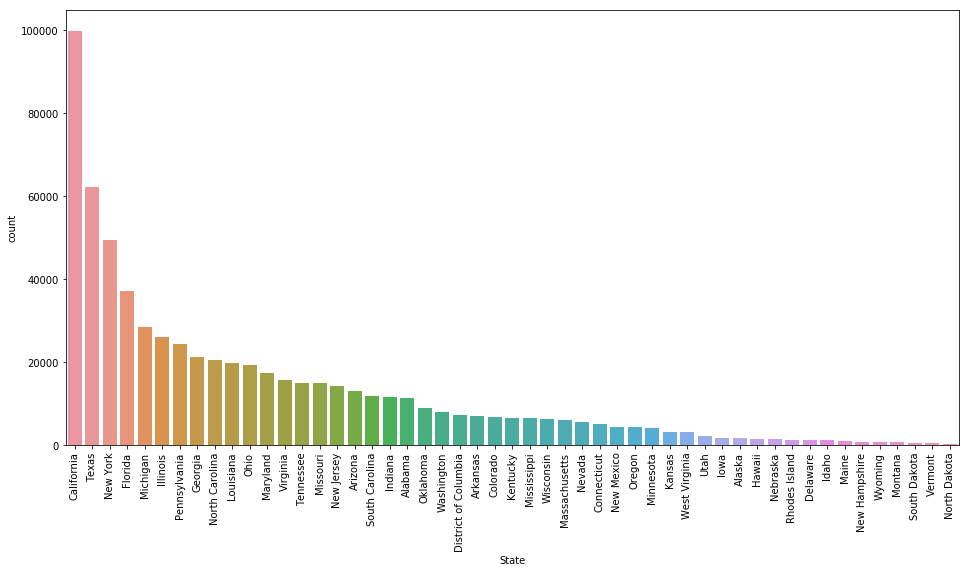

In [18]:
# State with the highest amount of Homicide Crimes reported

g = sns.countplot(x="State", data=train, order=r['State'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [19]:
# State with the highest Crime Type 'Murder or Manslaughter'

temp1 = train.loc[(train['Crime_Type'] != 'Manslaughter by Negligence')]
temp1 = temp1.groupby(["State"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
temp1

,State,Count
4,California,98994
43,Texas,61087
32,New York,49222
9,Florida,35594
22,Michigan,28425
13,Illinois,25509
38,Pennsylvania,23877
10,Georgia,20895
33,North Carolina,19936
18,Louisiana,19318


In [20]:
# State with the highest Crime Type 'Manslaughter by Negligence'

temp2 = train.loc[(train['Crime_Type'] != 'Murder or Manslaughter')]
z = temp2.groupby(["State"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
z

,State,Count
9,Florida,1570
43,Texas,1008
4,California,789
33,North Carolina,454
2,Arizona,364
13,Illinois,362
38,Pennsylvania,359
35,Ohio,316
18,Louisiana,311
25,Missouri,265


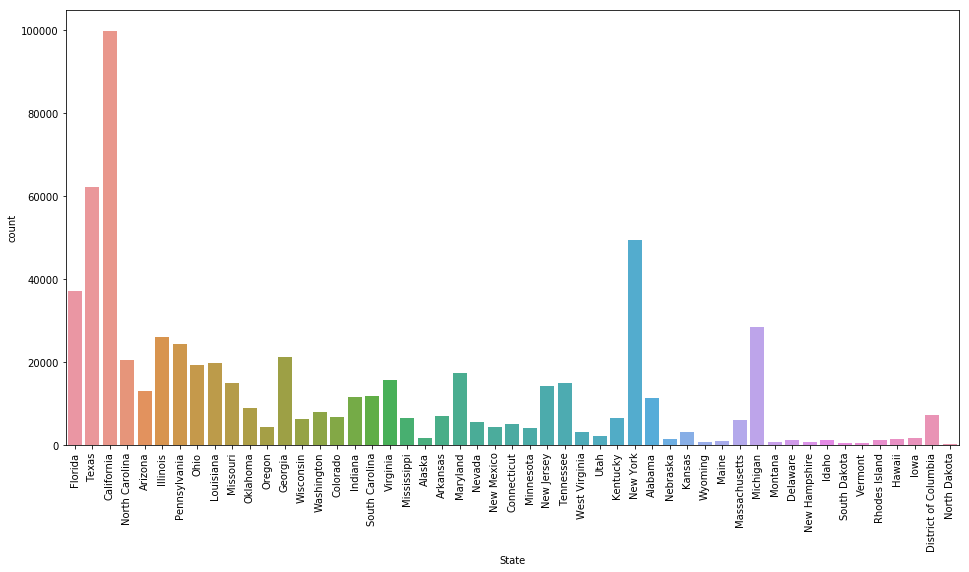

In [21]:
# State with the highest amount of Homicide Crimes 'Manslaughter by Negligence'

g = sns.countplot(x="State", data=train, order = z['State'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [22]:
# Weapon most likely used for homicides by Perpetrator Sex

train.groupby(["Perpetrator_Sex", "Weapon"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)

,Perpetrator_Sex,Weapon,Count
24,Male,Handgun,199776
40,Unknown,Handgun,100601
25,Male,Knife,61015
16,Male,Blunt Object,45782
28,Male,Shotgun,24307
22,Male,Firearm,23103
38,Unknown,Firearm,22590
41,Unknown,Knife,20199
27,Male,Rifle,18486
8,Female,Handgun,17107


In [23]:
# Highest Perpetrator Age Group

train.groupby(["Perpetrator_Age"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)

,Perpetrator_Age,Count
0,0.0,216327
20,20.0,21625
19,19.0,20250
21,21.0,18983
18,18.0,18834
22,22.0,18433
23,23.0,17604
25,25.0,17542
24,24.0,16379
26,26.0,14716


In [24]:
# Highest Victim Age Group

train.groupby(["Victim_Age"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)

,Victim_Age,Count
22,22,23049
20,20,23031
25,25,22939
21,21,22796
23,23,22438
19,19,21939
24,24,21830
26,26,20469
27,27,19465
30,30,18966


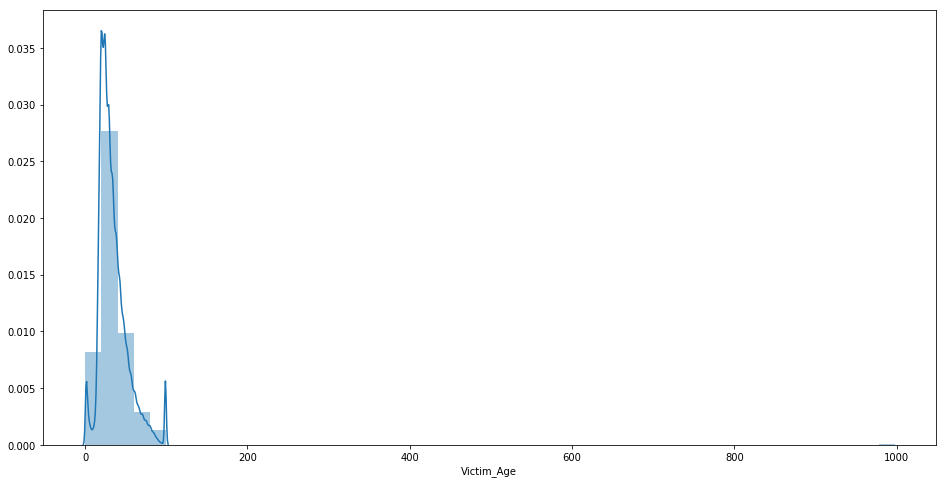

In [25]:
#filtered = train[(train['Victim_Age'] >= 0) & (train['Victim_Age'] <= 100)]
sns.distplot(train['Victim_Age'], kde=True, hist=True, kde_kws={"clip": [0,100]})

In [26]:
# Highest Homicide Perpetrator Race

o = train.groupby(["Perpetrator_Race"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
o

,Perpetrator_Race,Count
4,White,218243
1,Black,214516
3,Unknown,196047
0,Asian/Pacific Islander,6046
2,Native American/Alaska Native,3602


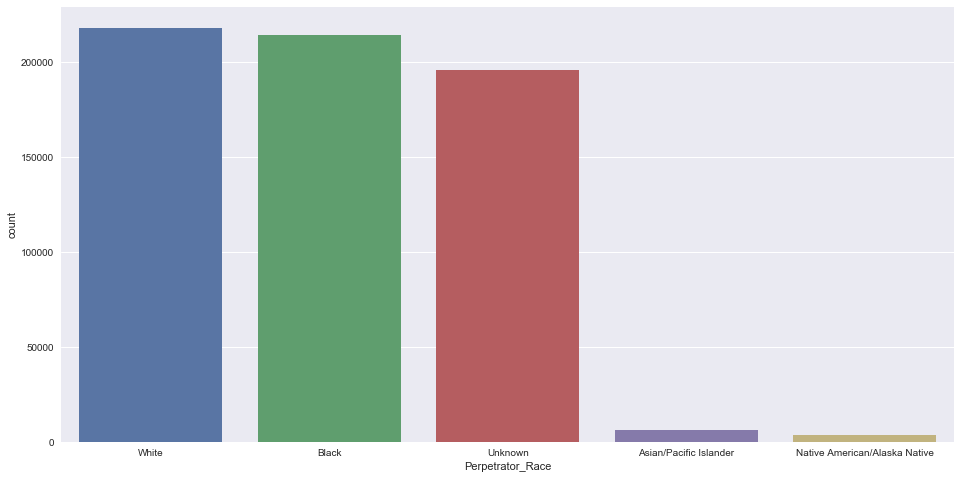

In [27]:
sns.set(style="darkgrid")
g = sns.countplot(x="Perpetrator_Race", data=train, order=o['Perpetrator_Race'])

In [28]:
# Highest Homicide Victim Race

o = train.groupby(["Victim_Race"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
o

,Victim_Race,Count
4,White,317422
1,Black,299899
0,Asian/Pacific Islander,9890
3,Unknown,6676
2,Native American/Alaska Native,4567


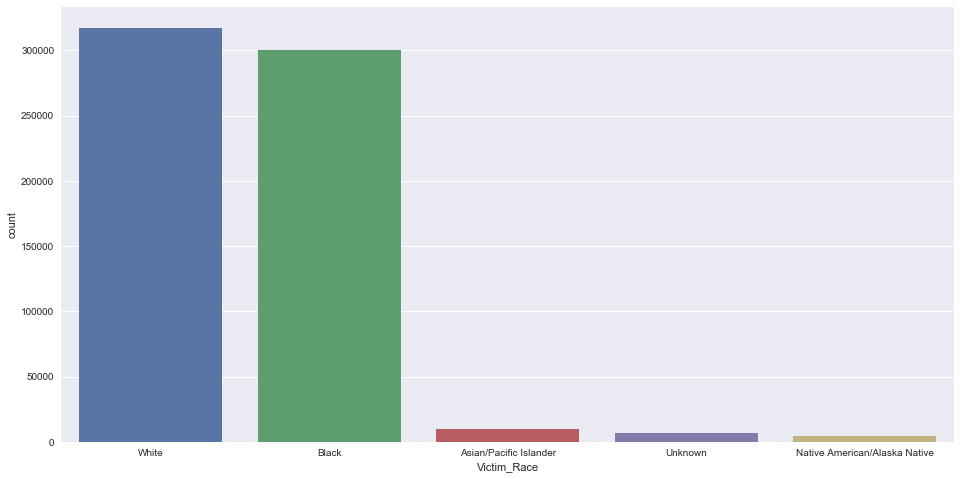

In [29]:
sns.set(style="darkgrid")
g = sns.countplot(x="Victim_Race", data=train, order=o['Victim_Race'])

In [30]:
# Weapon most likely used for homicides by Perpetrator Ethnicity

train.groupby(["Perpetrator_Ethnicity", "Weapon"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)

,Perpetrator_Ethnicity,Weapon,Count
40,Unknown,Handgun,221533
24,Not Hispanic,Handgun,71388
41,Unknown,Knife,61320
32,Unknown,Blunt Object,46250
38,Unknown,Firearm,40380
47,Unknown,Unknown,27901
8,Hispanic,Handgun,24563
25,Not Hispanic,Knife,24089
44,Unknown,Shotgun,17930
16,Not Hispanic,Blunt Object,16776


In [31]:
# Weapon most likely used for homicides by Perpetrator Race

train.groupby(["Perpetrator_Race", "Weapon"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)

,Perpetrator_Race,Weapon,Count
24,Black,Handgun,116477
55,Unknown,Handgun,103565
71,White,Handgun,93662
72,White,Knife,36322
25,Black,Knife,35395
63,White,Blunt Object,29170
53,Unknown,Firearm,23019
56,Unknown,Knife,21065
16,Black,Blunt Object,20400
47,Unknown,Blunt Object,16326


In [32]:
# Highest Homicide by Victim Ethnicity

p = train.groupby(["Victim_Ethnicity"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
p

,Victim_Ethnicity,Count
2,Unknown,368303
1,Not Hispanic,197499
0,Hispanic,72652


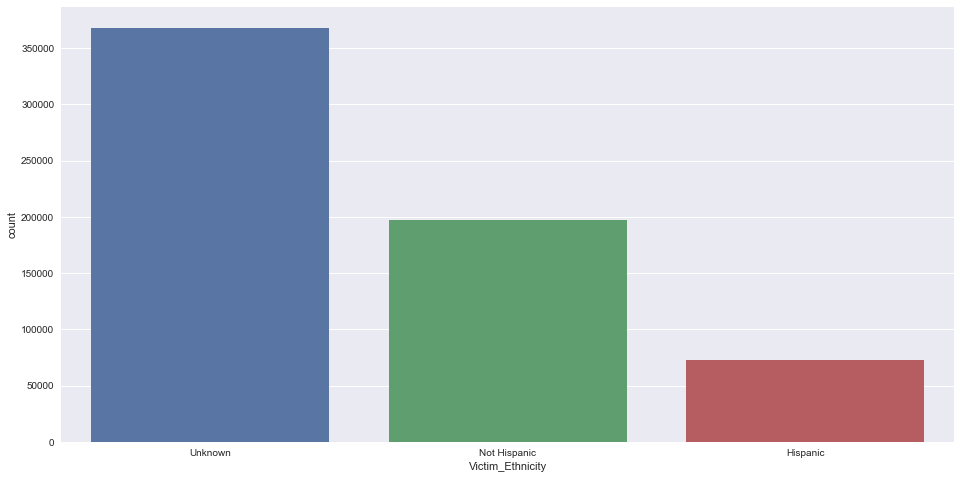

In [33]:
# Highest Homicide by Victim Ethnicity

sns.set(style="darkgrid")
g = sns.countplot(x="Victim_Ethnicity", data=train)
#g.set_xticklabels(rotation=45)

In [34]:
# Highest Homicide by Perpetrator Ethnicity

p = train.groupby(["Perpetrator_Ethnicity"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
p

,Perpetrator_Ethnicity,Count
2,Unknown,446410
1,Not Hispanic,145172
0,Hispanic,46872


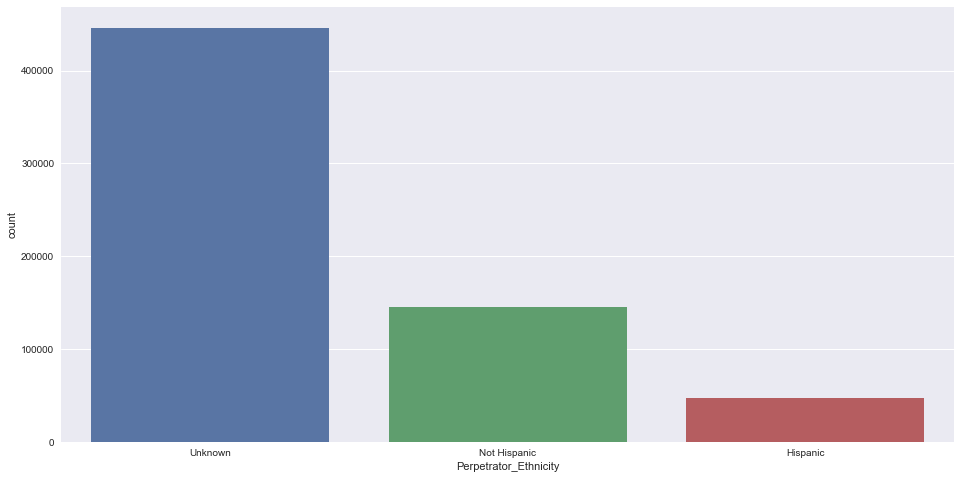

In [35]:
# Highest Homicide by Perpetrator Ethnicity

sns.set(style="darkgrid")
g = sns.countplot(x="Perpetrator_Ethnicity", data=train)

In [36]:
# Most Used Weapon per State

train_group = (train.groupby(["State", "Weapon"]).size()/train.groupby('State').size() * 100).reset_index()
train_group.columns.values[2] = 'Percentage'
result = train_group.sort_values(['State', 'Percentage'], ascending=[1,0]).groupby('State').head(3)
result

,State,Weapon,Percentage
7,Alabama,Handgun,55.836850
8,Alabama,Knife,14.345992
11,Alabama,Shotgun,9.036568
23,Alaska,Handgun,33.889920
24,Alaska,Knife,15.027829
15,Alaska,Blunt Object,12.368584
39,Arizona,Handgun,54.805376
40,Arizona,Knife,12.656359
31,Arizona,Blunt Object,11.467640
54,Arkansas,Handgun,45.775155


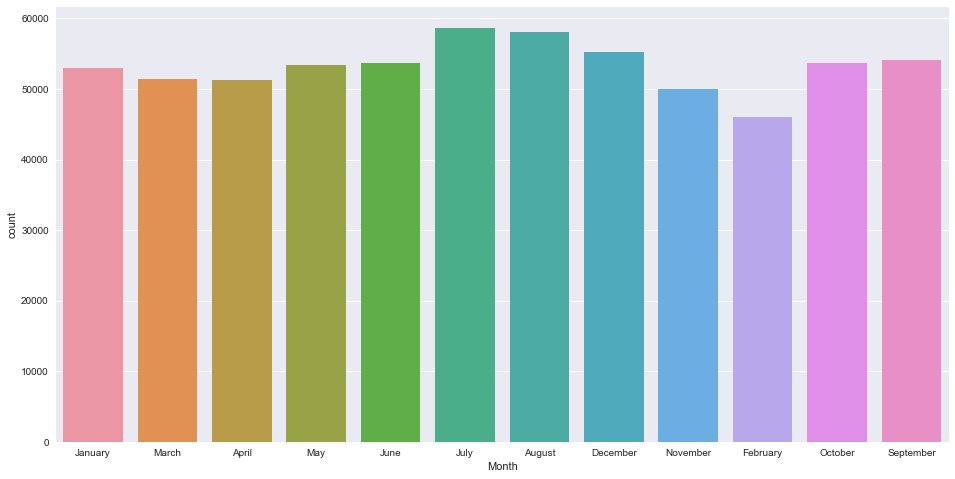

In [37]:
# Most Homicides occur during which months

sns.set(style="darkgrid")
g = sns.countplot(x="Month", data=train)

In [38]:
# Year with the highest amount of historical homicide crimes

q = train.groupby(["Year"]).size().reset_index(name="Count").sort_values(by='Count', ascending=0)
q

,Year,Count
13,1993,24335
12,1992,23793
14,1994,23246
0,1980,23092
11,1991,22657
10,1990,21246
1,1981,21208
15,1995,21179
2,1982,20544
6,1986,20125


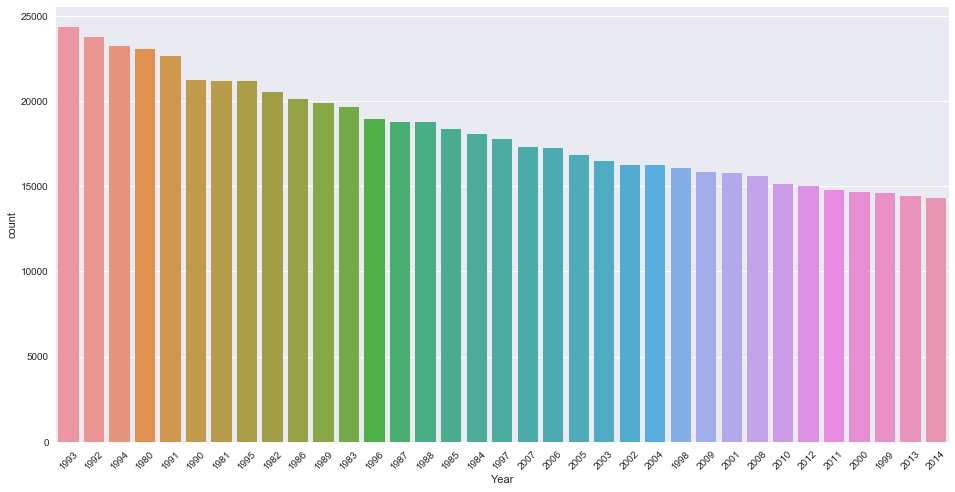

In [39]:
# Years with the highest amount of Homicide Crimes reported

g = sns.countplot(x="Year", data=train, order=q['Year'])
g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [40]:
# Top 5 weapons used in Homicides

train = train[train.Weapon != 'Unknown']
topweapons = train.Weapon.value_counts().index.tolist()
fiveweapons = topweapons[:5]
fiveweapons

['Handgun', 'Knife', 'Blunt Object', 'Firearm', 'Shotgun']

In [41]:
# Highest Homicide Rate between which two sexes
# Set a default value
train['PVSex'] = 'Unknown kills ?'

# Value for Female x Female
train['PVSex'][(train['Perpetrator_Sex'] == 'Female') & (train['Victim_Sex'] == 'Female')] = 'Female kills Female'
 
# Value for Female x Male
train['PVSex'][(train['Perpetrator_Sex'] == 'Female') & (train['Victim_Sex'] == 'Male')] = 'Female kills Male'

# Value for Male x Male
train['PVSex'][(train['Perpetrator_Sex'] == 'Male') & (train['Victim_Sex'] == 'Male')] = 'Male kills Male'

# Value for Male x Female
train['PVSex'][(train['Perpetrator_Sex'] == 'Male') & (train['Victim_Sex'] == 'Female')] = 'Male kills Female'

C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A v

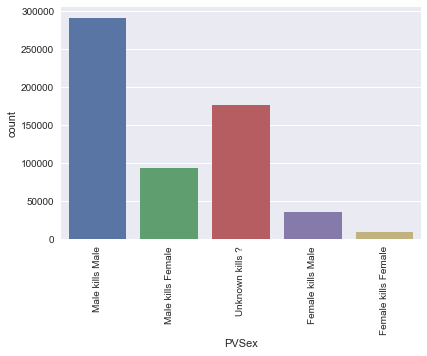

In [42]:
g = sns.factorplot("PVSex", data=train, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

In [43]:
# Homicide more likely between same or different ethnicities
# Set a default value
train['EthK'] = 'Unknown kills ?'

# Value for Not Hispanic x Not Hispanic
train['EthK'][(train['Perpetrator_Ethnicity'] == 'Not Hispanic') & (train['Victim_Ethnicity'] == 'Not Hispanic')] = 'Not Hispanic kills Not Hispanic'
 
# Value for Not Hispanic x Hispanic
train['EthK'][(train['Perpetrator_Ethnicity'] == 'Not Hispanic') & (train['Victim_Ethnicity'] == 'Hispanic')] = 'Not Hispanic kills Hispanic'

# Value for Hispanic x Not Hispanic
train['EthK'][(train['Perpetrator_Ethnicity'] == 'Hispanic') & (train['Victim_Ethnicity'] == 'Not Hispanic')] = 'Hispanic kills Not Hispanic'

# Value for Hispanic x Hispanic
train['EthK'][(train['Perpetrator_Ethnicity'] == 'Hispanic') & (train['Victim_Ethnicity'] == 'Hispanic')] = 'Hispanic kills Hispanic'

C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A v

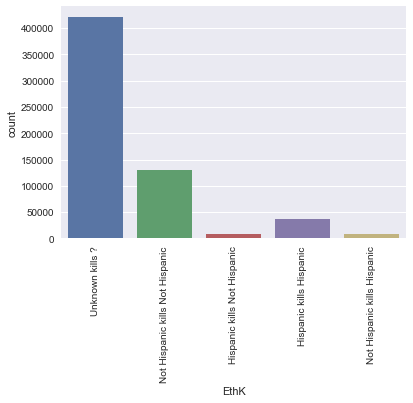

In [44]:
g = sns.factorplot("EthK", data=train, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

In [45]:
# Homicide more likely between same or different races
# Set a default value
train['RaceK'] = 'Unknown kills ?'

# Value for Native American/Alaska Native x Native American/Alaska Native
train['RaceK'][(train['Perpetrator_Race'] == 'Native American/Alaska Native') & (train['Victim_Race'] == 'Native American/Alaska Native')] = 'Native American/Alaska Native kills Native American/Alaska Native'
 
# Value for Native American/Alaska Native x White
train['RaceK'][(train['Perpetrator_Race'] == 'Native American/Alaska Native') & (train['Victim_Race'] == 'White')] = 'Native American/Alaska Native kills White'

# Value for Native American/Alaska Native x Black
train['RaceK'][(train['Perpetrator_Race'] == 'Native American/Alaska Native') & (train['Victim_Race'] == 'Black')] = 'Native American/Alaska Native kills Black'

# Value for Native American/Alaska Native x Asian/Pacific Islander
train['RaceK'][(train['Perpetrator_Race'] == 'Native American/Alaska Native') & (train['Victim_Race'] == 'Asian/Pacific Islander')] = 'Native American/Alaska Native kills Asian/Pacific Islander'

# Value for White x Native American/Alaska Native
train['RaceK'][(train['Perpetrator_Race'] == 'White') & (train['Victim_Race'] == 'Native American/Alaska Native')] = 'White kills Native American/Alaska Native'
 
# Value for White x White
train['RaceK'][(train['Perpetrator_Race'] == 'White') & (train['Victim_Race'] == 'White')] = 'White kills White'

# Value for White x Black
train['RaceK'][(train['Perpetrator_Race'] == 'White') & (train['Victim_Race'] == 'Black')] = 'White kills Black'

# Value for White x Asian/Pacific Islander
train['RaceK'][(train['Perpetrator_Race'] == 'White') & (train['Victim_Race'] == 'Asian/Pacific Islander')] = 'White kills Asian/Pacific Islander'

# Value for Black x Native American/Alaska Native
train['RaceK'][(train['Perpetrator_Race'] == 'Black') & (train['Victim_Race'] == 'Native American/Alaska Native')] = 'Black kills Native American/Alaska Native'
 
# Value for Black x White
train['RaceK'][(train['Perpetrator_Race'] == 'Black') & (train['Victim_Race'] == 'White')] = 'Black kills White'

# Value for Black x Black
train['RaceK'][(train['Perpetrator_Race'] == 'Black') & (train['Victim_Race'] == 'Black')] = 'Black kills Black'

# Value for Black x Asian/Pacific Islander
train['RaceK'][(train['Perpetrator_Race'] == 'Black') & (train['Victim_Race'] == 'Asian/Pacific Islander')] = 'Black kills Asian/Pacific Islander'

# Value for Asian/Pacific Islander x Native American/Alaska Native
train['RaceK'][(train['Perpetrator_Race'] == 'Asian/Pacific Islander') & (train['Victim_Race'] == 'Native American/Alaska Native')] = 'Asian/Pacific Islander kills Native American/Alaska Native'
 
# Value for Asian/Pacific Islander x White
train['RaceK'][(train['Perpetrator_Race'] == 'Asian/Pacific Islander') & (train['Victim_Race'] == 'White')] = 'Asian/Pacific Islander kills White'

# Value for Asian/Pacific Islander x Black
train['RaceK'][(train['Perpetrator_Race'] == 'Asian/Pacific Islander') & (train['Victim_Race'] == 'Black')] = 'Asian/Pacific Islander kills Black'

# Value for Asian/Pacific Islander x Asian/Pacific Islander
train['RaceK'][(train['Perpetrator_Race'] == 'Asian/Pacific Islander') & (train['Victim_Race'] == 'Asian/Pacific Islander')] = 'Asian/Pacific Islander kills Asian/Pacific Islander'

C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\giris\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A v

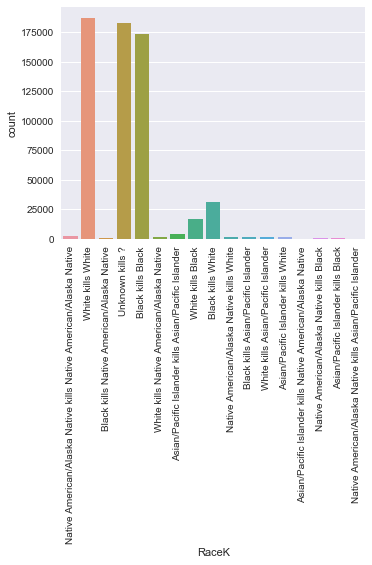

In [46]:
g = sns.factorplot("RaceK", data=train, aspect=2, kind="count")
g.set_xticklabels(rotation=90)